In [1]:
#Load the dataset patients.csv into pandas dataframe
import pandas as pd
df = pd.read_csv('diabetic_data.csv')

In [2]:
#Show the shape of the data
df.shape

(101766, 50)

In [3]:
#Delete the column ‘encounter_id’ (why axis =1 (whenever  row (axis=0) or a column (axis=1).))
df = df.drop('encounter_id', axis=1)

In [4]:
#Identify missing values in the columns. You will notice that there are some columns with the missing values, but those values are represented by a different character such as ‘?’. Replace them by NaN.
# Identify missing values represented by '?'
df.replace('?', pd.NA, inplace=True) #inplace needed for editing existing df (if false we have assign new variable for df)


In [5]:
print("Summary of Missing Values Before Replacement:")
print(df.isnull().sum())

Summary of Missing Values Before Replacement:
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
ac

In [6]:


# Display summary of missing values after replacement
print("\nSummary of Missing Values After Replacement:")
print(df.isnull().sum())


Summary of Missing Values After Replacement:
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
ac

In [7]:
#5th point
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})

# Display the updated 'readmitted' column
print(df['readmitted'].value_counts())

0    90409
1    11357
Name: readmitted, dtype: int64


In [8]:
# Display the data types of each column
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 

In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

In [10]:
# Drop columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index
df = df.drop(columns=columns_to_drop)

In [11]:
print("\nDataFrame after Dropping Columns with More than 90% Missing Values:")
print(df.head())


DataFrame after Dropping Columns with More than 90% Missing Values:
   patient_nbr             race  gender      age  admission_type_id  \
0      8222157        Caucasian  Female   [0-10)                  6   
1     55629189        Caucasian  Female  [10-20)                  1   
2     86047875  AfricanAmerican  Female  [20-30)                  1   
3     82442376        Caucasian    Male  [30-40)                  1   
4     42519267        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1       <NA>   
1                         1                    7                 3       <NA>   
2                         1                    7                 2       <NA>   
3                         1                    7                 2       <NA>   
4                         1                    7                 1       <NA>   

          medical

In [12]:
# List of near zero-variance columns to be deleted
columns_to_delete = [
    'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
    'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Drop the near zero-variance columns
df = df.drop(columns=columns_to_delete)

# Display the updated DataFrame after dropping columns
print("\nDataFrame after Dropping Near Zero-Variance Columns:")
print(df.head())


DataFrame after Dropping Near Zero-Variance Columns:
   patient_nbr             race  gender      age  admission_type_id  \
0      8222157        Caucasian  Female   [0-10)                  6   
1     55629189        Caucasian  Female  [10-20)                  1   
2     86047875  AfricanAmerican  Female  [20-30)                  1   
3     82442376        Caucasian    Male  [30-40)                  1   
4     42519267        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1       <NA>   
1                         1                    7                 3       <NA>   
2                         1                    7                 2       <NA>   
3                         1                    7                 2       <NA>   
4                         1                    7                 1       <NA>   

          medical_specialty  ...

In [13]:
# Drop rows with null values
df = df.dropna()

# Display the updated DataFrame after dropping rows
print("\nDataFrame after Dropping Rows with Null Values:")
print(df.head())


DataFrame after Dropping Rows with Null Values:
       patient_nbr       race  gender       age  admission_type_id  \
20446     20123568  Caucasian  Female   [70-80)                  1   
20737     20377854  Caucasian  Female   [60-70)                  2   
20824     20408121  Caucasian  Female  [90-100)                  1   
21083     20542797  Caucasian    Male   [70-80)                  1   
23879      7239654  Caucasian  Female   [70-80)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
20446                        22                    7                 7   
20737                         1                    1                 3   
20824                         1                    7                 4   
21083                         2                    7                10   
23879                         3                    6                12   

      payer_code           medical_specialty  ...  A1Cresult  metformin  \
20446     

In [14]:
# Display summary statistics of numerical columns
numerical_summary = df.describe()

# Identify outliers using IQR method (quantile is for the get the percentage required of df will save in df )
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

# Display the updated DataFrame after removing outliers
print("\nDataFrame after Removing Outliers:")
print(df_no_outliers.head())


DataFrame after Removing Outliers:
       patient_nbr       race  gender       age  admission_type_id  \
20737     20377854  Caucasian  Female   [60-70)                  2   
20824     20408121  Caucasian  Female  [90-100)                  1   
21083     20542797  Caucasian    Male   [70-80)                  1   
23879      7239654  Caucasian  Female   [70-80)                  1   
23922     15466212  Caucasian    Male   [70-80)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
20737                         1                    1                 3   
20824                         1                    7                 4   
21083                         2                    7                10   
23879                         3                    6                12   
23922                         3                    6                12   

      payer_code medical_specialty  ...  A1Cresult  metformin  glipizide  \
20737         MC      

C:\Users\sunny\AppData\Local\Temp\ipykernel_17684\1539452489.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
# Identify numerical columns for normalization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the updated DataFrame after feature normalization
print("\nDataFrame after Feature Normalization:")
print(df.head())


DataFrame after Feature Normalization:
       patient_nbr       race  gender       age  admission_type_id  \
20446     0.106265  Caucasian  Female   [70-80)                0.0   
20737     0.107608  Caucasian  Female   [60-70)                0.2   
20824     0.107767  Caucasian  Female  [90-100)                0.0   
21083     0.108479  Caucasian    Male   [70-80)                0.0   
23879     0.038227  Caucasian  Female   [70-80)                0.0   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
20446                  0.777778             0.285714          0.461538   
20737                  0.000000             0.000000          0.153846   
20824                  0.000000             0.285714          0.230769   
21083                  0.037037             0.285714          0.692308   
23879                  0.074074             0.238095          0.846154   

      payer_code           medical_specialty  ...  A1Cresult  metformin  \
20446         MC  O

In [19]:
# Display the shape of the resulting DataFrame
print("\nShape of DataFrame after Feature Normalization:")
print(df.shape)


Shape of DataFrame after Feature Normalization:
(26755, 31)


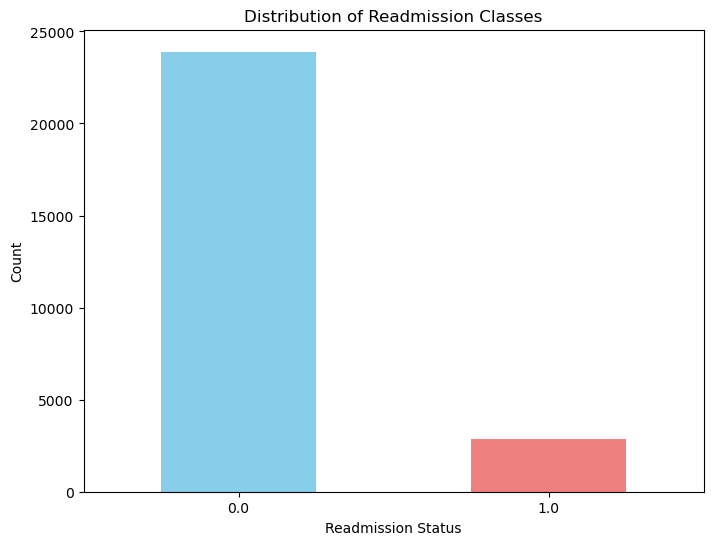

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['readmitted'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Readmission Classes')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

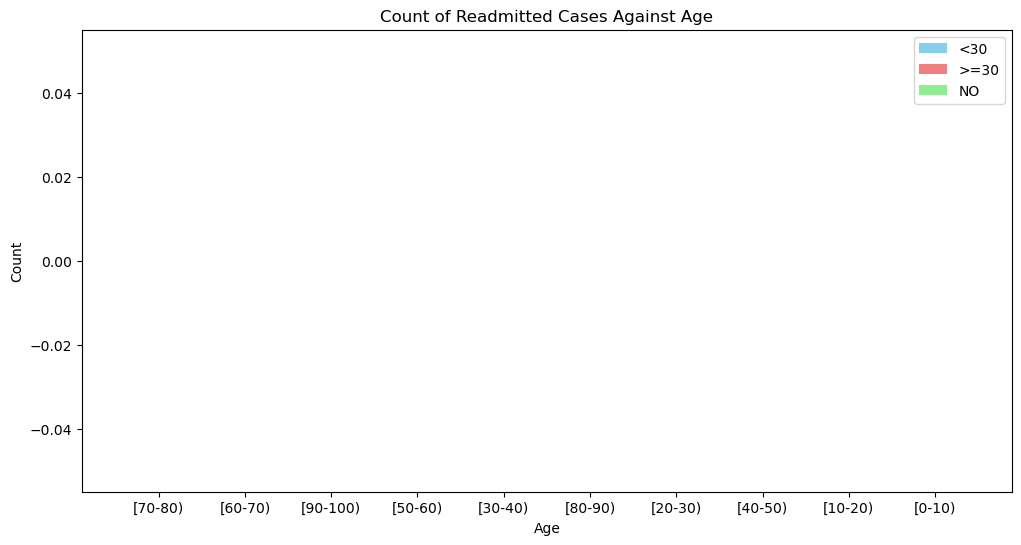

In [21]:
# Plot the count of readmitted cases against age
plt.figure(figsize=(12, 6))
plt.bar(df['age'], df[df['readmitted'] == '<30']['readmitted'].count(), color='skyblue', label='<30')
plt.bar(df['age'], df[df['readmitted'] == '>=30']['readmitted'].count(), color='lightcoral', label='>=30')
plt.bar(df['age'], df[df['readmitted'] == 'NO']['readmitted'].count(), color='lightgreen', label='NO')

plt.title('Count of Readmitted Cases Against Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [20]:
print(df['num_medications'])

20446     0.1750
20737     0.1250
20824     0.1000
21083     0.2125
23879     0.2250
           ...  
101735    0.1625
101743    0.3125
101747    0.2250
101749    0.3500
101764    0.2500
Name: num_medications, Length: 26755, dtype: float64


<Figure size 1200x600 with 0 Axes>

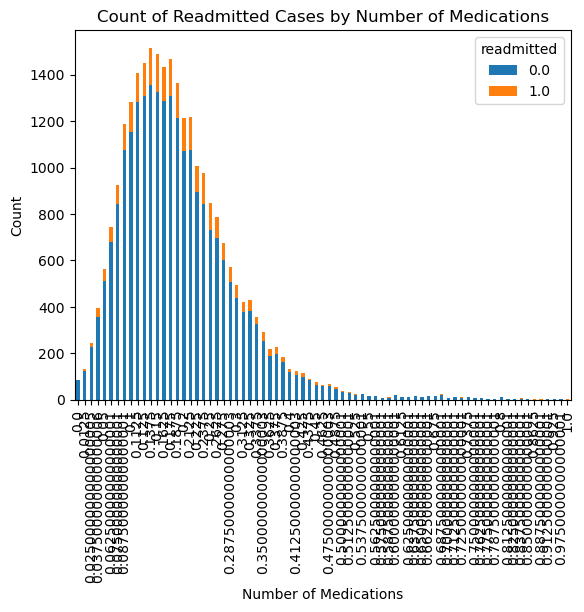

In [22]:
# Calculate the total number of medications (Need to work on this)
df['num_medications'] = df.filter(like='num_medications').sum(axis=1)

# Plot the count of the target variable against the number of medications
plt.figure(figsize=(12, 6))
df.groupby(['num_medications', 'readmitted']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Count of Readmitted Cases by Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.show()

In [25]:
print(df)

        patient_nbr       race  gender       age  admission_type_id  \
20446      0.106265  Caucasian  Female   [70-80)                0.0   
20737      0.107608  Caucasian  Female   [60-70)                0.2   
20824      0.107767  Caucasian  Female  [90-100)                0.0   
21083      0.108479  Caucasian    Male   [70-80)                0.0   
23879      0.038227  Caucasian  Female   [70-80)                0.0   
...             ...        ...     ...       ...                ...   
101735     0.562904  Caucasian    Male   [70-80)                0.2   
101743     0.249745  Caucasian    Male   [80-90)                0.0   
101747     0.175477  Caucasian  Female   [70-80)                0.0   
101749     0.561834  Caucasian  Female   [70-80)                0.4   
101764     0.167364  Caucasian  Female   [80-90)                0.2   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
20446                   0.777778             0.285714          0.461538 

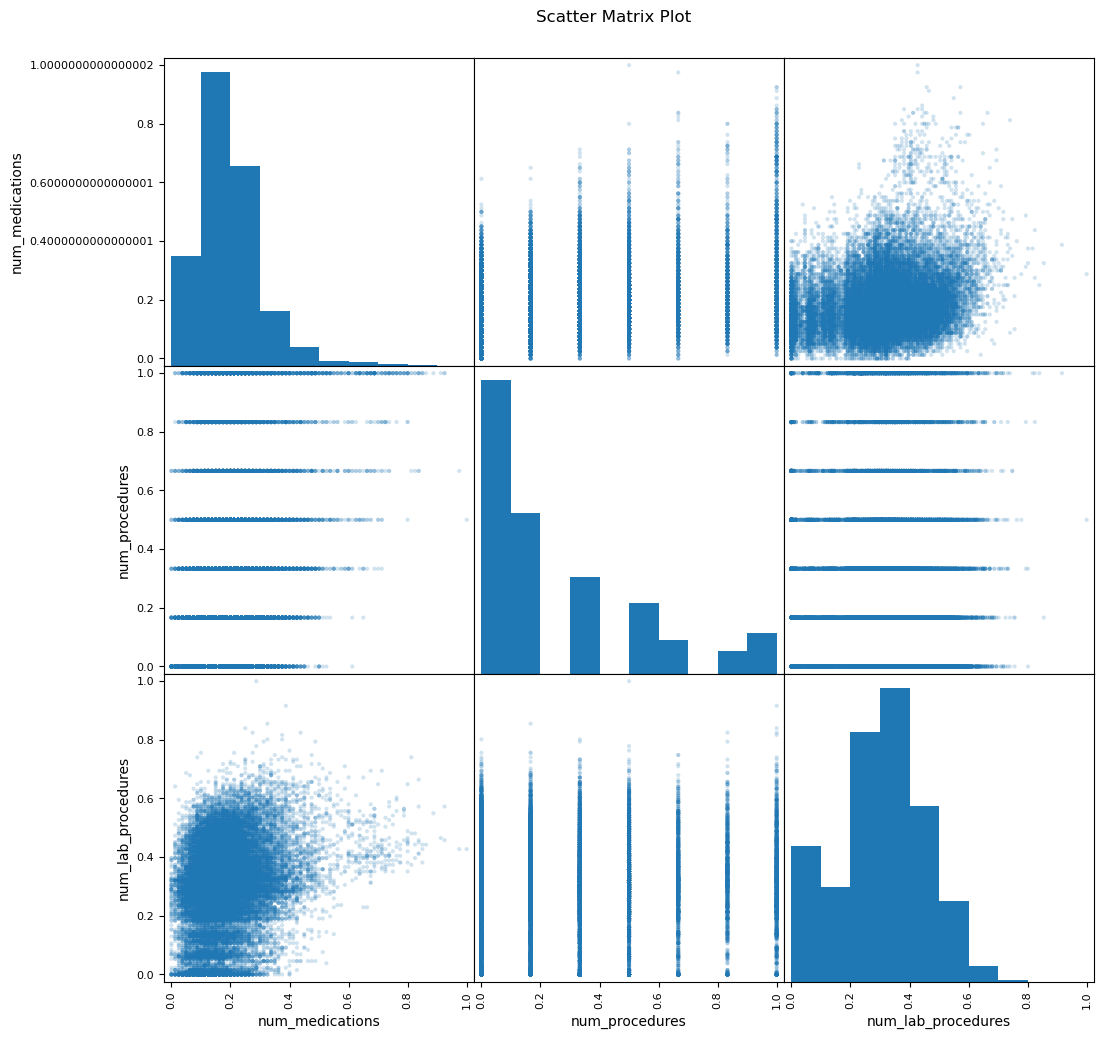

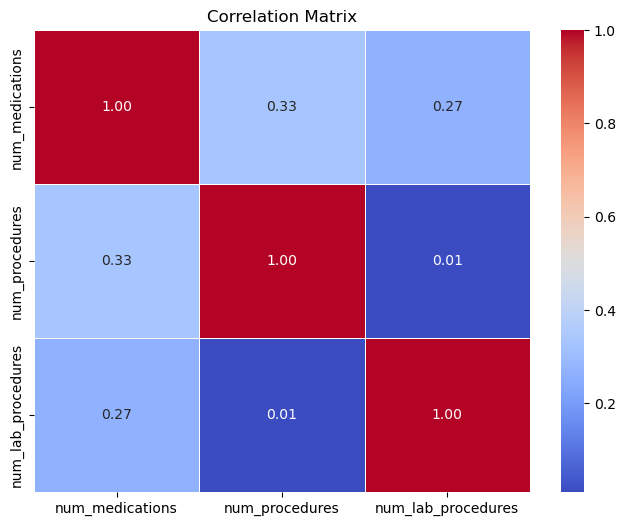

Highly Correlated Feature Pairs:
                    num_medications  num_procedures  num_lab_procedures
num_medications               False           False               False
num_procedures                False           False               False
num_lab_procedures            False           False               False


In [26]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt



# Select a subset of columns for demonstration (adjust as needed)
subset_columns = ['num_medications', 'num_procedures', 'num_lab_procedures']

# Create a scatter matrix plot
scatter_matrix(df[subset_columns], alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix Plot', y=0.92)
plt.show()

# Display the correlation matrix with seaborn heatmap
correlation_matrix = df[subset_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated pairs of features
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)
print("Highly Correlated Feature Pairs:")
print(highly_correlated_pairs)


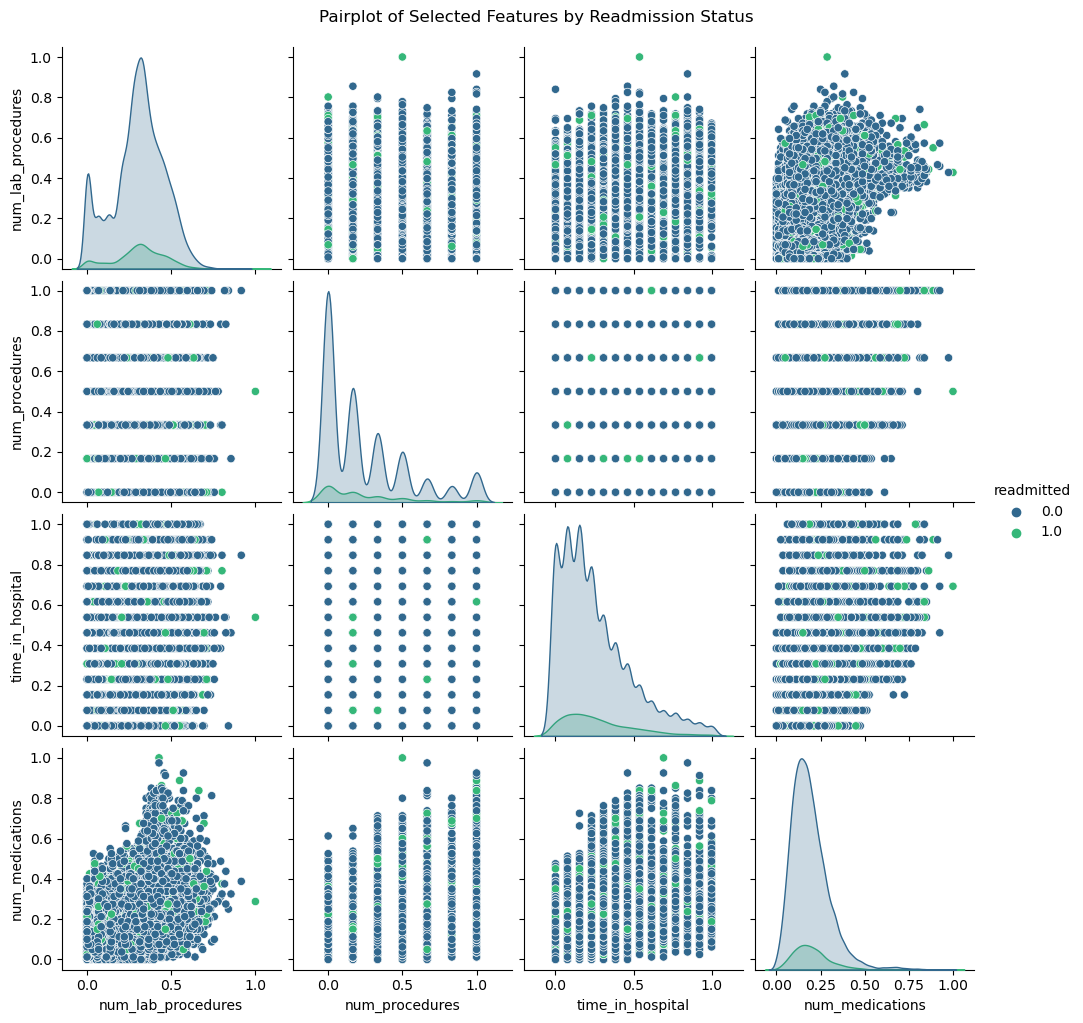

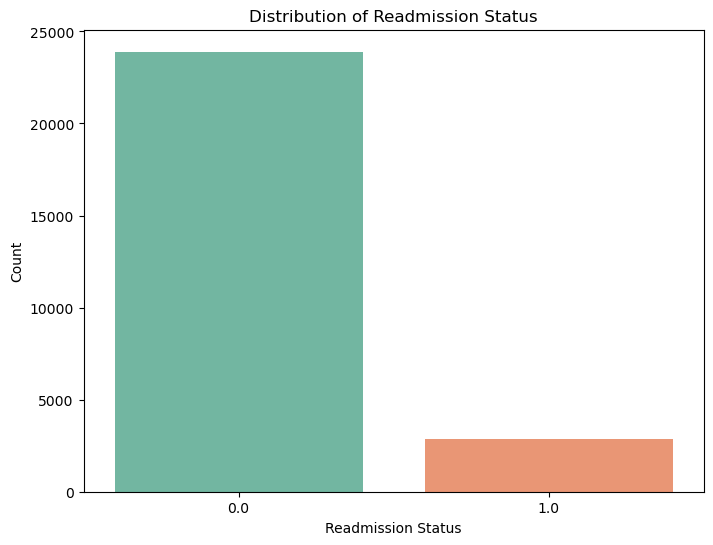

In [24]:
 #Pairplot to visualize relationships between multiple variables
sns.pairplot(df[['num_lab_procedures', 'num_procedures', 'time_in_hospital', 'num_medications', 'readmitted']],
             hue='readmitted', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Selected Features by Readmission Status', y=1.02)
plt.show()

# Count plot to show the distribution of readmission status
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=df, palette='Set2')
plt.title('Distribution of Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()